# Preliminary work: Importing libraries, defining the the main directory

In [145]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")

# Amber_laptop
#data_folder = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data") 

In [146]:
# path to where the data are on your machine
data_path = data_folder.joinpath('20230211')

# File structure:
## trial_data.csv 
Trial matrix, readable as a pandas dataframe. Times are in indices, i.e. can be used directly to index arrays. For example, to access the poisition of the animal at the reward_zone_onset in trial 0, do:

position[trial_data.iloc[0]['reward_zone_onset']]
## behaviour_data.csv
Python dictionary with the following keys:
- time: times in seconds, used to match with neural data
- position: cumulative position of the animal on the threadmill
- lick_onsets: timestamps of lick onsets (in indices)
- lick_onffsets: timestamps of lick offsets (in indices)
- reward_onsets: timestamps of when the reward was give (in indices). It is the same information that can be found in the trial matrix, plus eventual rewards given to encourage the animal.
- reward_offsets: timestamps in indices
## neural_data.csv
Python dictionary with the following keys:
- traces: array with shape n_neurons x n_frames. activations of the neurons over time
- other things not needed for now
## parameters.yml
Parameters used to preprocess the data (not of interest for further analysis)

In [147]:
# visualize files in session folder
glob.glob(str(data_path)+'\\*')

['C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\behaviour_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\neural_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\parameters.yml',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\trial_data.csv']

# Trial matrix
the trial matrix is in a .csv file. The structure is the same as before, with 2 exceptions:
- 'trial_duration' is not calculated (can be calculated as tunnel2_offset-env_onset)
- there is no 'clean_trial' label anymore

In [148]:
trial_data_file = data_path.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,51742,62734,84207,87311,NaN,1,48182.0,163347.0,True,63550,66561
1,87311.0,117556,120011,154259,158038,NaN,3,NaN,NaN,False,121313,124339
2,158038.0,172831,213693,242507,244749,NaN,1,166359.0,257770.0,True,231849,234863
3,244749.0,266401,269199,339747,342111,NaN,2,260775.0,363012.0,True,270289,273308
4,342111.0,372283,382112,388546,396273,NaN,1,366022.0,399709.0,True,383091,386109
5,396273.0,413147,415210,436766,437438,NaN,2,402721.0,449813.0,True,415977,418985
6,437438.0,459485,462992,471835,474908,NaN,1,452816.0,481899.0,True,464101,467108
7,474908.0,526669,539910,611337,614135,NaN,3,484920.0,617838.0,True,541697,544704
8,614135.0,665133,667664,683879,684559,NaN,3,620845.0,688756.0,True,668392,671403
9,684559.0,696625,700692,720849,724404,NaN,2,691767.0,741830.0,True,702266,705266


# Behavioural data

In [149]:
bdata_file = data_path.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [150]:
position = b_data['position']
pos_list = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    print(f'{i}: {np.max(pos_segment)-np.min(pos_segment)}')
    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    pos_list.append(pos_segment)

0: 4455
1: 2501
2: 2100
3: 2299
4: 2204
5: 2100
6: 2398
7: 2401
8: 2208
9: 2395
10: 2493
11: 2205
12: 2451
13: 2343
14: 2554
15: 2503
16: 2555
17: 2393
18: 2503
19: 2604
20: 2451
21: 2444
22: 2498
23: 2609
24: 2259
25: 2583
26: 2802
27: 2449
28: 2505
29: 2492
30: 2407
31: 2244
32: 2255
33: 2503
34: 2206
35: 2535
36: 2404
37: 2353
38: 2250
39: 2295


# Histogram: edges & centers
- Edges: The edges represent the boundaries of each bin in the histogram. These boundaries determine the range of data values that are included in each bin. By default, the edges are defined so that each bin has the same width, but you can also specify custom bin sizes if needed.
- Centers: The centers represent the midpoint of each bin in the histogram. They are commonly used to label the x-axis of the histogram, and can provide additional insight into the distribution of the data.

<BarContainer object of 10 artists>

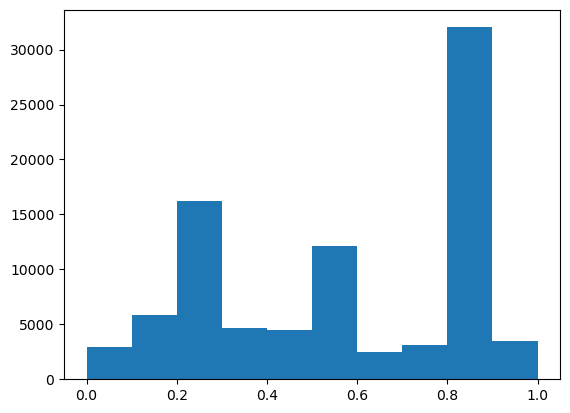

In [151]:
values,edges = np.histogram(pos_list[0])
centers = [(edges[i+1]+edges[i])/2 for i in range(len(edges)-1)]

plt.bar(centers,values,width=0.1)

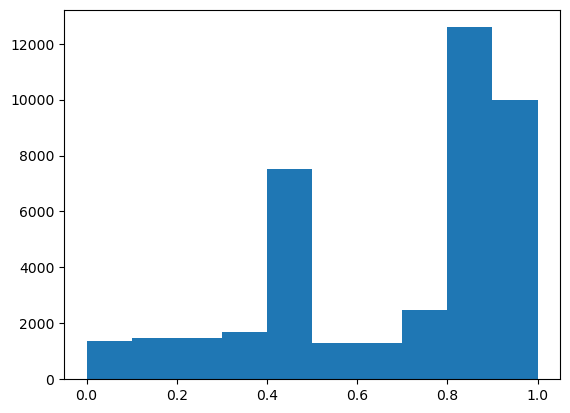

In [152]:
plt.hist(pos_list[5]);

## Function: compute_feature_position

In [153]:
def compute_feature_position(timestamp, position, min_pos, max_pos):
    '''
    Takes the time of an event (in index), the position array, the min of the trial position and the max
    of the trial position, returns the normalized position of the event.

    PARAMETERS:
    timestamp (int) : timestamp of the event (in index).
    position (numpy.ndarray) : position array.
    min_pos (float) : minimum position value of the trial.
    max_pos (float) : maximum position value of the trial.

    RETURNS:
    norm_pos (float): normalized position of the event.
    '''
    pos = position[int(timestamp)]
    norm_pos = (pos - min_pos) / (max_pos - min_pos)
    return norm_pos

In [154]:
#?compute_feature_position # call the doc string of a function (even homebrew functions)

# Plotting events with normalised position
goal 1:
- isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
- use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)
- This will tell us if there is a change in licking patterns during the course of the trial

see session_outlook.ipynb for the plot

goal 2:
- extract the poistion timecourse in the environment of each trial (betwen env_onset and tunnel1_onset).
- normalize the position between 0 and 1: norm_pos = (pos-min(pos))/(max(pos)-min(pos))
- concatenate all trial positions together compute the histogram of positions across the whole session
This will tell us if there is a tendency from the animal to prefer parts of the environment, and will be useful down the line when we compute place cells

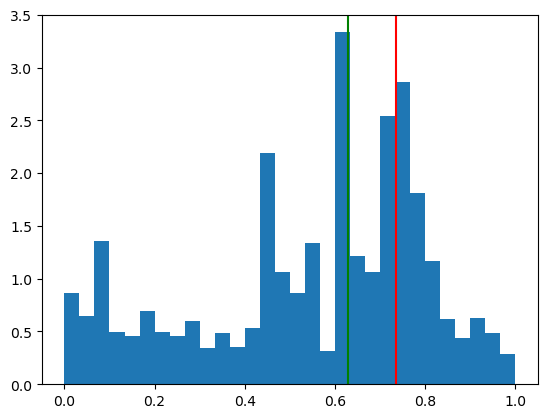

In [155]:
position = b_data['position']
rz_onsets = []
tunnel1_onsets = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    min_pos = np.min(pos_segment)
    max_pos = np.max(pos_segment)

    rz_pos = compute_feature_position(row['reward_zone_onset'],position,min_pos,max_pos)
    rz_onsets.append(rz_pos)

    t1_pos = compute_feature_position(row['tunnel1_onset'],position,min_pos,max_pos)
    tunnel1_onsets.append(t1_pos)
    
    #normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))

    if i==0:
        norm_pos = pos_segment
    else:
        norm_pos = np.hstack([norm_pos,pos_segment])

plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')

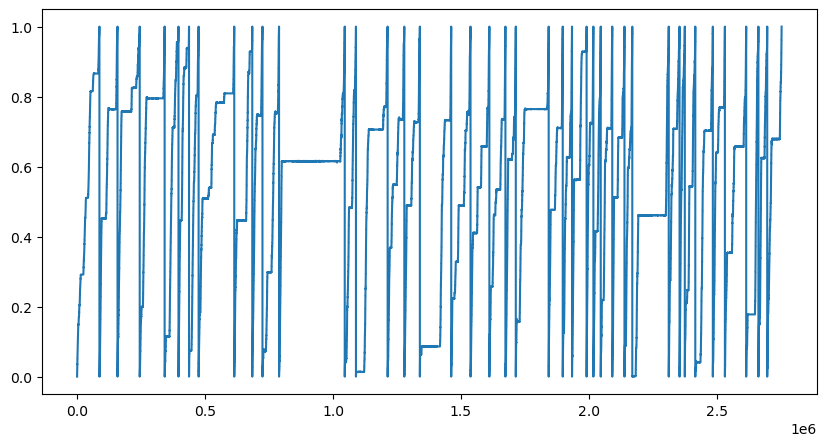

In [156]:
plt.figure(figsize=(10,5))
plt.plot(norm_pos)

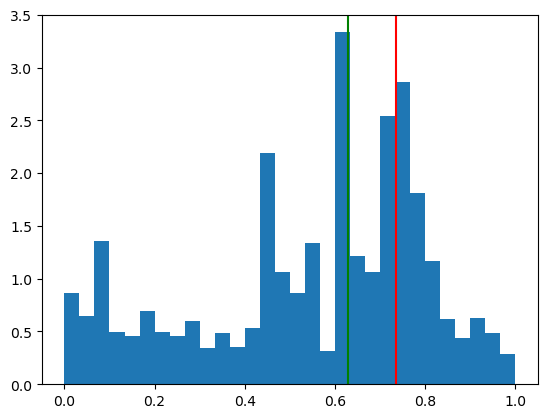

In [157]:
plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')

In [158]:
# insight into what the behavioural data contains
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (2813328,)
position with shape: (2813328,)
lick_onsets with shape: (3516,)
lick_offsets with shape: (3517,)
reward_onsets with shape: (40,)
reward_offsets with shape: (40,)


In [159]:
b_data['lick_offsets'][:-1]-b_data['lick_onsets']

array([ -30,  -25,  -47, ...,  -77,  -48, -655], dtype=int64)

# Neural data

In [160]:
ndata_file = data_path.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

In [161]:
for k in n_data.keys():
    if type(n_data[k])==np.ndarray:
        print(f'{k}-> array with shape: {n_data[k].shape}')
    else:
        print(f'{k}-> list with len {len(n_data[k])}')

traces-> array with shape: (355, 83737)
footprints-> array with shape: (490, 490, 355)
df_f-> array with shape: (355, 83737)
deconvolved-> list with len 355
positions-> array with shape: (355, 2)
contour-> list with len 355


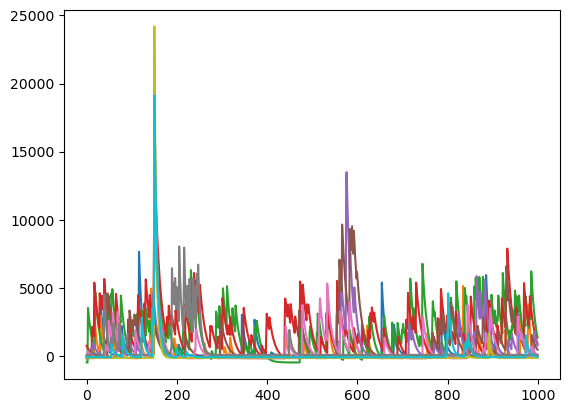

In [162]:
for i in range(10):
    plt.plot(n_data['traces'][i,:1000])

# Position histogram with events
Verticle lines: reward zone onset, tunnel1 onset, sound onset.

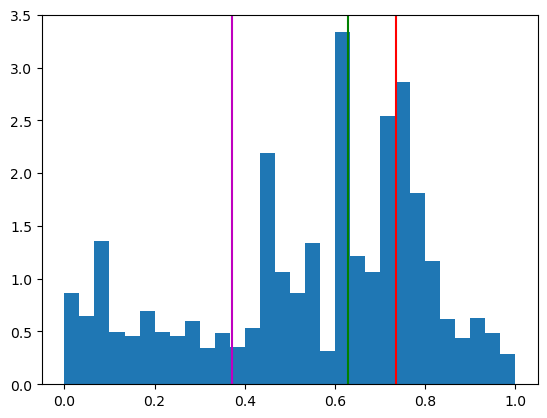

In [163]:
position = b_data['position']
rz_onsets = []
tunnel1_onsets = []
sound_onsets = []

for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    min_pos = np.min(pos_segment)
    max_pos = np.max(pos_segment)

    rz_pos = compute_feature_position(row['reward_zone_onset'],position,min_pos,max_pos)
    rz_onsets.append(rz_pos)

    t1_pos = compute_feature_position(row['tunnel1_onset'],position,min_pos,max_pos)
    tunnel1_onsets.append(t1_pos)

    if pd.notnull(row['sound_onset']): # skip NaNs
        sound_pos = compute_feature_position(int(row['sound_onset']),position,min_pos,max_pos)
        sound_onsets.append(sound_pos)

    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    if i==0:
        norm_pos = pos_segment
    else:
        norm_pos = np.hstack([norm_pos,pos_segment])

plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')
plt.axvline(x=np.nanmean(sound_onsets),c='m')

In [164]:
norm_pos # normalised array of concatenated positional values between 0-1 per trial instead x-y frames

array([0., 0., 0., ..., 1., 1., 1.])

# Function: position_event_histogram

In [165]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
def position_event_histogram(b_data, trial_data):
    '''
    Plot a histogram of the normalized position with markers for specific events:
    Reward zone onset, Tunnel1 onset, Sound onset

    PARAMETERS:
    b_data (pandas.DataFrame) : a DataFrame containing the behavior data.
    trial_data (pandas.DataFrame) : a DataFrame containing the trial data.

    RETURNS:
    None.
    '''
    
    position = b_data['position']
    rz_onsets = []
    tunnel1_onsets = []
    sound_onsets = []

    for i in range(len(trial_data)):
        row = trial_data.iloc[i]
        onset = row['env_onset'].astype(int)
        offset = row['tunnel2_offset']

        pos_segment = position[onset:offset]
        min_pos = np.min(pos_segment)
        max_pos = np.max(pos_segment)

        rz_pos = compute_feature_position(row['reward_zone_onset'], position, min_pos, max_pos)
        rz_onsets.append(rz_pos)

        t1_pos = compute_feature_position(row['tunnel1_onset'], position, min_pos, max_pos)
        tunnel1_onsets.append(t1_pos)

        if pd.notnull(row['sound_onset']): # skip NaNs
            sound_pos = compute_feature_position(int(row['sound_onset']), position, min_pos, max_pos)
            sound_onsets.append(sound_pos)

        # normalize
        pos_segment = (pos_segment - np.min(pos_segment)) / (np.max(pos_segment) - np.min(pos_segment))
        if i == 0:
            norm_pos = pos_segment
        else:
            norm_pos = np.hstack([norm_pos, pos_segment])

    plt.hist(norm_pos, bins=30, density=True)
    plt.axvline(x=np.mean(rz_onsets), c='r')
    plt.axvline(x=np.mean(tunnel1_onsets), c='g')
    plt.axvline(x=np.nanmean(sound_onsets), c='m')
    plt.show()

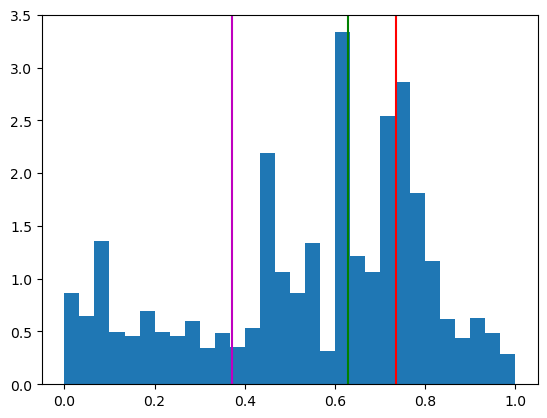

In [166]:
# calling the histogram with the function
position_event_histogram(b_data, trial_data)

# Using scipy statistics and gaussian filter (1 dimensional)
Calculating velocity using position (in frames) and time (as dt in Hz)

In [167]:
from scipy.ndimage import gaussian_filter1d
dt = 1./1000. # frequency of the recording apparatus is 1000 Hz
pos = gaussian_filter1d(b_data['position'].astype(float),sigma=2) # can vary with sigma value for additional smoothing
vel = np.diff(pos.astype(float)) # Calculate the n-th discrete difference along the given axis
vel = gaussian_filter1d(vel,50)

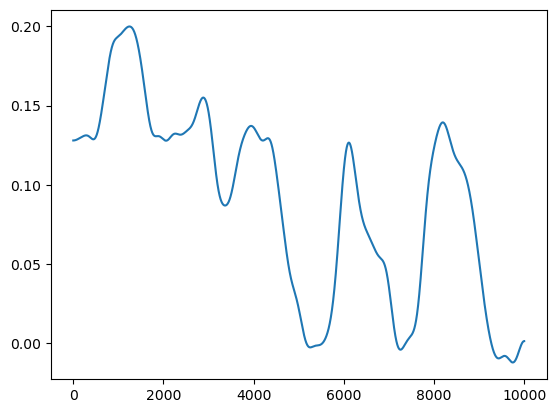

In [168]:
plt.plot(gaussian_filter1d(vel[:10000],100))

In [169]:
vel = vel[:len(norm_pos)]

In [170]:
len(norm_pos)

2752932

In [171]:
len(vel)

2752932

It's important to note that selecting too few bins can oversimplify the data and obscure important patterns, while selecting too many bins can make it difficult to interpret the results and can lead to overfitting.

In [172]:
from scipy.stats import binned_statistic # import a function from a library module
nbins=50 # number of bins
avg_vel,edges,_ = binned_statistic(norm_pos,vel,bins=nbins) # use _ to have a function return a value in an unused character to avoid error
centers = [(edges[i+1]+edges[i])/2 for i in range(len(edges)-1)] # The centers represent the midpoint of each bin. The edges represent the boundaries of each bin

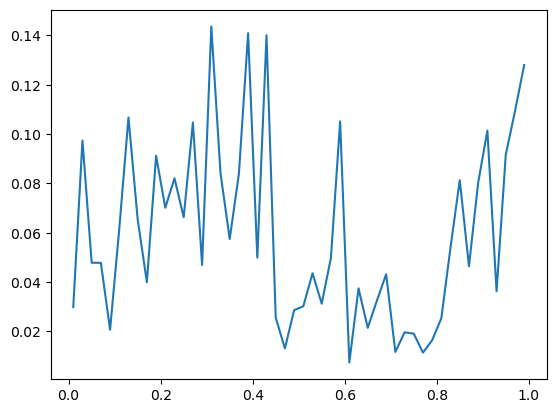

In [173]:
plt.plot(centers,avg_vel)

Compute the effect of sound on the speed:
- For every trial take sound onset T, and chunk the speed timecourse from T-2 seconds to T+2 seconds.
- Use binned_statistic to make a time-speed histogram (time ad x, speed as values)
- append the values of this histogram to a list of lists, at the end this will have shape (n_trials x n_bins )
- Average over trial to get the average speed in each bin, and plot it with plot()
- You can also compute the standard deviation over trials, and have it as a confidence interval using the fill_between() plotting function

Speed around sound onset:
- cycle over the trials
- take the sound onset
- compute start = sound onset - 2000 and end = sound_onset + 2000
- take vel[start:end] (the velocity array in this interval) and store it in another array 'velocity' with hstack, as we did with norm_pos
- store in a 'times' array the corresponding times relative to sound onset, this will be every time the same and can be done with np.linspace(-2000,-2000)
- use binned_statistic with 'times' as x and 'velocities' as value
- plot the result like we did for the case of velocity vs position. Here the zero value will be the sound onset

In [174]:
# define compute start & end
t_on = 2000
t_off = 4000

# cycle over the trials using integer indexing
for i in range(len(trial_data)):
    row = trial_data.iloc[i] # define the row for

    # the timecourse of interest for the velocity
    if not np.isnan(row['sound_onset']):
        onset = row['sound_onset'].astype(int) - t_on # 2 seconds before
        offset = row['sound_onset'].astype(int) + t_off # 2 seconds after
        trial_vel = vel[onset:offset]
        #print(len(trial_vel))
        if i == 0: # compared to hstack, vstack requires slices of equal length
            vel_matrix = trial_vel
        else:
            vel_matrix = np.vstack([vel_matrix,trial_vel])
print(vel_matrix.shape) # shape should be: (number of trials, t_on + t_off)

(32, 6000)


## Function computed_sliced_matrix

In [175]:
# import numpy as np
# import pandas as pd
def computed_sliced_matrix(trial_matrix, vel, t_on, t_off):
    """
    Computes a 2D array (trial x timepoints) of velocity values for a given time window around a sound onset.
    for each trial in a trial_matrix dataframe.
    
    PARAMATERS:
    trial_matrix (pandas.DataFrame): a dataframe containing the trial data.
    vel (numpy.ndarray): a 1D array of velocity values.
    t_on (int): the number of milliseconds before the sound onset to include in the velocity timecourse.
    t_off (int): the number of milliseconds after the sound onset to include in the velocity timecourse.
    
    RETURNS:
    vel_matrix (numpy.ndarray): a 2D array of velocity values for each trial, with shape (number of trials, t_on + t_off).
    """
    
    # initialize the velocity matrix and count variable
    vel_matrix = np.zeros((len(trial_matrix), t_on + t_off))
    count = 0
    
    # cycle over the trials using integer indexing
    for i in range(len(trial_matrix)):
        row = trial_matrix.iloc[i]
        
        # check if the row contains valid data
        if not np.isnan(row['sound_onset']):
            onset = row['sound_onset'].astype(int) - t_on # 2 seconds before
            offset = row['sound_onset'].astype(int) + t_off # 2 seconds after
            trial_vel = vel[onset:offset]
            
            # add the trial's velocity timecourse to the velocity matrix
            vel_matrix[count,:] = trial_vel
            count += 1
            
    # truncate the velocity matrix to remove rows with NaN values
    vel_matrix = vel_matrix[:count,:]
    
    return vel_matrix

- In the above function, the count variable is initialized before the loop and incremented within the if block for each valid trial. This ensures that the count variable is always defined when it is referenced, even if some rows are skipped. Required in order to avoid NaNs in the trial_matrix data.
- I excluded np.vstack in the generated function because it's not necessary to use it in this case. Instead of concatenating arrays vertically, we can initialize an array of zeros with the desired shape (vel_matrix = np.zeros((len(trial_matrix), t_on + t_off))) and then fill it in with the velocity values for each trial using integer indexing (vel_matrix[i,:] = trial_vel). This is more memory-efficient than concatenating arrays vertically with np.vstack and ensures that each row of the resulting vel_matrix has the same length (t_on + t_off).

In [176]:
vel_matrix = computed_sliced_matrix(trial_data, vel, 2000, 4000)
vel_matrix.shape

(32, 6000)

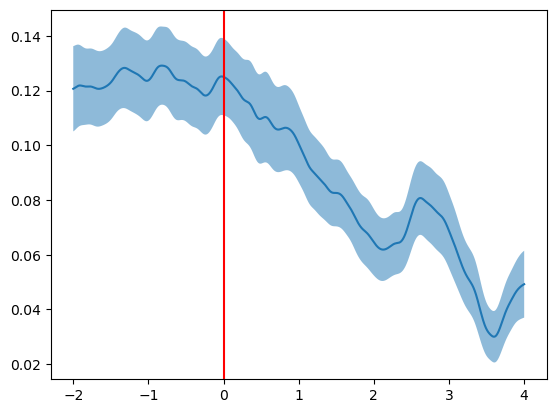

In [177]:
from scipy.stats import sem

avg_vel = np.mean(vel_matrix, axis = 0) # avarage velocity
std_vel = np.std(vel_matrix, axis = 0) # standard deviation of velocity
sem_vel = sem(vel_matrix, axis = 0) # standard error of the mean of velocity

t = np.linspace(-t_on/1000, t_off/1000, t_on+ t_off) # Return evenly spaced numbers over a specified interval
plt.plot(t, avg_vel)
#plt.fill_between(t, avg_vel - std_vel, avg_vel + std_vel, alpha = 0.5)
plt.fill_between(t, avg_vel - sem_vel, avg_vel + sem_vel, alpha = 0.5)
plt.axvline(x = 0, c= 'r') # sound onset timepoint from trial_matrix

In [178]:
t

array([-2.        , -1.99899983, -1.99799967, ...,  3.99799967,
        3.99899983,  4.        ])

# Compute the t test between the speed distribution before the sound onset and the speed distribution after. It should go something like:
- take the vel_matrix
- compute two matrices vel_before and vel_after, by slicing vel_matrix at the sound onset (t_on tells you the index to use)
- flatten the matrices into 1d arrays
- compute the t-test on the two arrays with ttest_ind(a,b) (see documentation in slack)